# 低阈值与高阈值钙通道的门控特性对比

本实例将展示如何使用 `braincell` 库分析低阈值 T 型钙通道和高阈值钙通道的门控变量稳态特性。通过对比它们的门控曲线，你将理解不同钙通道在神经元电活动中的功能差异。

## 准备工作

首先确保已安装必要的库（`braincell`、`brainunit`、`braintools`、`matplotlib`），并导入所需模块：

In [9]:
import braintools
import brainunit as u
import matplotlib.pyplot as plt
import braincell

## 代码详解

### 创建钙通道模型

`braincell` 内置了多种基于经典文献的离子通道模型，命名格式为 `通道类型_文献标识`，如 `ICaT_HP1992` 表示基于 Huguenard & Prince 1992 年研究的 T 型钙通道。
如果你想了解更多的离子通道模型，可以查阅我们的[离子通道模型库](https://braincell.readthedocs.io/latest/apis/braincell.channel.html)。

In [10]:
# 创建低阈值 T 型钙通道（ICaT）
cat = braincell.channel.ICaT_HP1992(1)

# 创建高阈值钙通道（ICaHT）
caht = braincell.channel.ICaHT_HM1992(1)


### 生成电压序列

为了分析通道门控特性随膜电位的变化，我们生成一个从 -100 mV 到 0 mV 的连续电压序列：

In [11]:
# 生成电压序列
vs = u.math.arange(-100 * u.mV, 0 * u.mV, 0.1 * u.mV)

### 计算门控变量稳态值并绘图

离子通道的门控变量的稳态值描述了在某一膜电位下，通道门控处于开放状态的概率。我们通过通道的 `f_q_inf` 和 `f_p_inf` 方法计算这些值，并可视化对比：

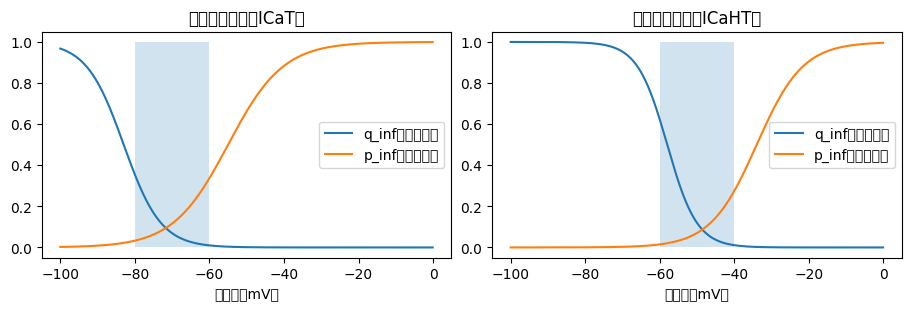

In [12]:
# 创建图形和子图布局
fig, gs = braintools.visualize.get_figure(1, 2, 3., 4.5)

# 计算低阈值通道的激活门稳态值和失活门稳态值
q_inf = cat.f_q_inf(vs)
p_inf = cat.f_p_inf(vs)

# 添加子图 1
fig.add_subplot(gs[0, 0])
plt.plot(vs / u.mV, q_inf, label='q_inf（激活门）')  # 横轴转换为 mV 便于阅读
plt.plot(vs / u.mV, p_inf, label='p_inf（失活门）')
plt.legend()  # 显示图例
plt.fill_between([-80, -60], 1., alpha=0.2)  # 标记低阈值通道的典型激活范围
plt.title('低阈值钙通道（ICaT）')
plt.xlabel('膜电位（mV）')

# 计算高阈值通道的 q_inf 和 p_inf
q_inf = caht.f_q_inf(vs)
p_inf = caht.f_p_inf(vs)

# 添加子图 2
fig.add_subplot(gs[0, 1])
plt.plot(vs / u.mV, q_inf, label='q_inf（激活门）')
plt.plot(vs / u.mV, p_inf, label='p_inf（失活门）')
plt.fill_between([-60, -40], 1., alpha=0.2)  # 标记高阈值通道的典型激活范围
plt.legend()
plt.xlabel('膜电位（mV）')
plt.title('高阈值钙通道（ICaHT）')

# 显示图形
plt.show()


## 结果解读

运行代码后，你将看到两张门控特性曲线图。

分析两张门控特性曲线图，核心结论如下：

低阈值钙通道（：
   - `q_inf`在膜电位约 -80 ~ -60 mV 时显著上升，表明此范围内通道易激活。
   - 与填充区域吻合，说明该通道在神经元静息电位附近即可被激活。

高阈值钙通道）：
   - `q_inf` 在膜电位约 -60 ~ -40 mV 时才显著上升，激活阈值更高。
   - 填充区域对应其典型激活范围，需更强去极化才能激活。

## 扩展练习

- 尝试修改通道的电导密度参数，观察门控曲线是否变化。
- 对比其他离子通道的门控特性，理解不同通道在动作电位中的协同作用。

通过这些工具，你可以快速构建符合电生理特性的通道模型，为复杂神经动力学模拟奠定基础。